### 🖋 **Notebook Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preparation

****

<h1><center> <span style="color:#0ad0f7">Artificial Intelligence (AI) Job Roles Salary Prediction</span></center></h1>

## `Initial Setup`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

## `Business Problem`
This site collects salary information anonymously from professionals all over the world in the AI, ML, Data Science space and makes it publicly available for anyone to use, share and play around with.

The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

**Context**:

The field of artificial intelligence (AI) encompasses a wide range of job roles, including machine learning engineers, data scientists, AI researchers, natural language processing specialists, and more. Each of these roles may command different salary levels based on factors like expertise, location, and industry. Accurate salary predictions are crucial for attracting and retaining AI talent.

**Problem Statement:**

The AI industry has been experiencing rapid expansion and transformation. New breakthroughs, applications, and technologies emerge regularly, leading to an ever-evolving landscape. As AI matures, it diversifies into specialized subfields and roles. These roles often require distinct sets of skills, expertise, and responsibilities. With the rapid growth and specialization within the AI industry, **employers and job seekers require insights into the competitive salary ranges associated with various AI job roles**. **This information is essential for recruitment, budgeting, and salary negotiations**.

Employers in the AI sector face the challenge of attracting and retaining top talent. To do so, they must be well-informed about the competitive salary ranges for various AI job roles. **Employers** need to know how much budget they should allocate for hiring AI professionals **without overpaying or underpaying**.

Job seekers in the AI field seek clarity about the compensation they can expect for their skills and expertise. Different AI job roles come with varying salary expectations, and job seekers want insights into what constitutes a fair and competitive offer. This information empowers **job seekers** to make informed decisions about job opportunities and **negotiate fair compensation** packages.

**Goals:**

With the problem above, we can determine our goals (solution) as: Provides salaries prediction by minimizing errors so that it is not too high and not too low.

**Project Stakeholders:**

**AI Job Seekers**: Individuals pursuing careers in the AI field.
<br>
**Human Resources Departement**: Personnel responsible for recruitment and compensation negotiations within AI.

**Analytic Approach:**

We will use Regression Model as method to achieve the goal.

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variable. In simple words, Regression can be defined as a Machine learning problem where we have to predict discrete values like price, rating, fees, salary, etc [Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/).

**Metric Evaluation:**

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms (Tavish Srivastava).

Regression machine learning models have various metrics such as MAE, MAPE, and R-squared.

- **Mean Absolute Error(MAE)** is a very simple metric which calculates the absolute difference between actual and predicted values [Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/).
- **Mean Absolute Percentage Error (MAPE)** measures the precision of the forecasts by showing the average percent difference between forecasts and actual activities regardless of whether the individual forecasts were too high or too low. A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and MAPE greater than 25% very low accuracy, so low that the forecast is not acceptable in terms of its accuracy [Swanson, David A](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.).
- **R squared (R²)** is a popular metric for identifying model accuracy. It tells how close are the data points to the fitted line generated by a regression algorithm. A larger R squared value indicates a better fit. This helps us to find the relationship between the independent variable towards the dependent variable. R² score ranges from 0 to 1. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model [Shweta Goyal](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af#:~:text=R%20squared%20is%20a%20popular,variable%20towards%20the%20dependent%20variable.).

## `Data Understanding`

Dataset can be access through this link: [dataset!](https://ai-jobs.net/salaries/download/) (accessed on September 6, 2023 at 09:58 AM)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `work_year` | The year the salary was paid. |
| `experience_level` | The experience level in the job during the year |
| `employment_type` | The type of employment for the role |
| `job_title` | The role worked in during the year. |
| `salary` | The total gross salary amount paid. |
| `salary_currency` |  The currency of the salary paid as an ISO 4217 currency code. |
| `salary_in_usd` | The salary in USD |
| `employee_residence` | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| `remote_ratio` | The overall amount of work done remotely |
| `company_location` | The country of the employer's main office or contracting branch |
| `company_size` | The median number of people that worked for the company during the year |

In [29]:
data = pd.read_csv("../data/raw/salaries.csv")
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1369,2023,SE,FT,Data Scientist,225000,USD,225000,US,100,US,M
5761,2022,EX,FT,Head of Data,160000,USD,160000,US,0,US,M
2650,2023,SE,FT,Applied Scientist,260000,USD,260000,US,0,US,L
4781,2023,SE,FT,Data Analyst,160000,USD,160000,US,100,US,M
2024,2023,SE,FT,Machine Learning Engineer,235400,USD,235400,US,100,US,M
6316,2022,SE,FT,Data Engineer,135000,USD,135000,PR,100,PR,M
4696,2023,SE,FT,Data Analytics Manager,138900,USD,138900,US,0,US,M
3207,2023,SE,FT,Research Engineer,370000,USD,370000,US,0,US,M
4205,2023,MI,FT,Data Engineer,149600,USD,149600,US,0,US,M
3034,2023,EN,FT,Data Analyst,61800,USD,61800,US,100,US,M


In [4]:
# skimming the dataset
pd.DataFrame(
                {
                'columns': data.columns.values,
                'data_type': data.dtypes.values,
                'null_value(%)': data.isna().mean().values * 100,
                'n_unique': data.nunique().values,
                'zero_value' : [True if (data[col] == 0).any() else False for col in data.columns],
                'neg_value' : [True if (data[col].dtype == int or data[col].dtype == float) and (data[col] < 0).any() else False for col in data.columns],
                'min': data.min().values,
                'max': data.max().values,
                'sample_unique': [data[col].unique() for col in data.columns]
                }
            )

,columns,data_type,null_value(%),n_unique,zero_value,neg_value,min,max,sample_unique
0,work_year,int64,0.0,4,False,False,2020,2023,"[2023, 2022, 2021, 2020]"
1,experience_level,object,0.0,4,False,False,EN,SE,"[SE, MI, EX, EN]"
2,employment_type,object,0.0,4,False,False,CT,PT,"[FT, CT, PT, FL]"
3,job_title,object,0.0,119,False,False,AI Architect,Staff Machine Learning Engineer,"[Data Engineer, Data Scientist, Machine Learni..."
4,salary,int64,0.0,1236,False,False,14000,30400000,"[202000, 132000, 185900, 129300, 204500, 14220..."
5,salary_currency,object,0.0,22,False,False,AUD,ZAR,"[USD, GBP, EUR, PLN, CAD, INR, BRL, PHP, TRY, ..."
6,salary_in_usd,int64,0.0,1500,False,False,15000,450000,"[202000, 132000, 185900, 129300, 204500, 14220..."
7,employee_residence,object,0.0,84,False,False,AD,ZA,"[US, GB, CA, EE, TR, ES, IT, PH, IN, DE, BR, F..."
8,remote_ratio,int64,0.0,3,True,False,0,100,"[100, 0, 50]"
9,company_location,object,0.0,72,False,False,AD,ZA,"[US, GB, CA, EE, PL, ES, IT, FR, CZ, IN, CH, D..."


**_Insight_**:
- This dataset contains 3755 rows and 11 columns
- Variable data type:
<br>
    a. Numerical Variable
    <br>
        - Discrete : -
        <br>
        - Continue : salary, salary_in_usd

    b. Categorical Variable
    <br>
        - Nominal : employment_type, job_title, salary_currency, employee_residence, company_location, remote_ratio
        <br>
        - Ordinal : experience_level, company_size

    c. Datetime Variable
    <br>
        - work_year
- Categorical columns with high cardinality (more than 15 categories, reference: [Encoding Cheat Sheet](https://raw.githubusercontent.com/alteryx/categorical_encoding/090e8d207aa14dd278e03209b4663cf9af0cad45/guides/flowchart/Categorical%20Encoding%20Flowchart.png)): job_title, salary_currency, employee_residence, company_location
- work_year column is still in int64 data type
- remote_ratio column can be interpret as categorical column further
- There is no missing values

### 1️⃣ Numerical Variable
Because we're going to only use salary_in_usd column in numerical columns, so we only check that column.

In [5]:
# check the distribution of salary_in_usd column

def distboxplot(data, bins, xticks, xlim, xlabel, unit, title=None, column=None, figsize=None):
    plt.style.use('default')
    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=figsize,
        gridspec_kw={'height_ratios':[4,1]},
        sharex=True
    )

    if column:
        sns.histplot(data=data, x=column, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data=data, x=column, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data[column].mean()
        median = data[column].median()
        mad = abs(data[column] - data[column].median()).median()
    else:
        sns.histplot(data=data, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data.mean()
        median = data.median()
        mad = abs(data - data.median()).median()
    
    # create tendencies measurement lines
    axes[0].axvline(x=mean, color="limegreen", linestyle="--", label=f"mean: {mean:.2f} {unit}")
    axes[0].axvline(x=median, color="orange", linestyle="-", label=f"median: {median:.2f} {unit}")

    axes[0].legend()
    axes[0].set_xlim(xlim[0], xlim[1])

    axes[1].set_xlabel(xlabel)
    axes[1].set_xticks(xticks)
    axes[1].set(yticklabels=[])

    if title:
        axes[0].set_title(title)
    plt.show();

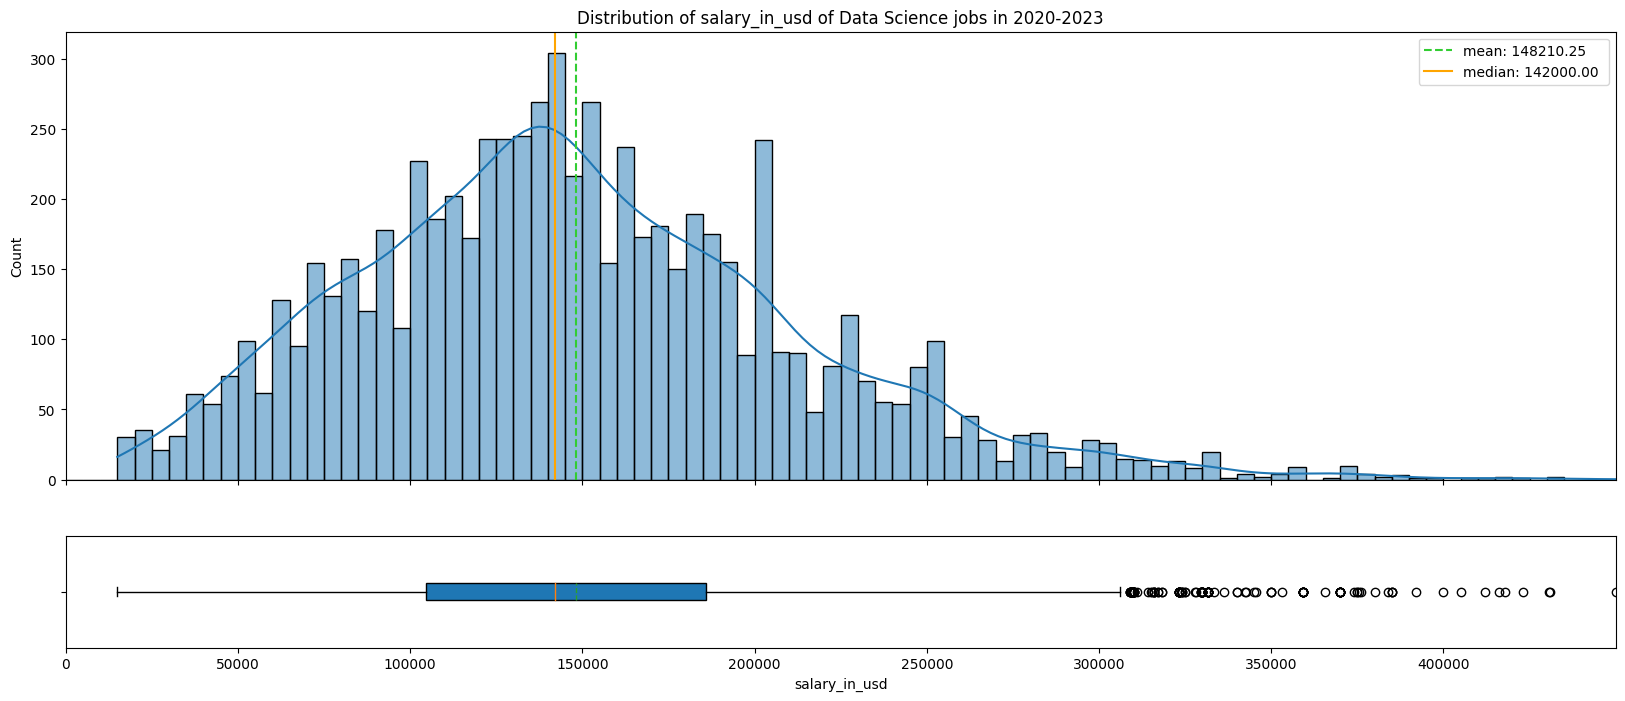

In [6]:
distboxplot(data=data, column='salary_in_usd', bins=np.arange(0,450000,5000),
            xticks=np.arange(0,450000,50000), xlim=[0,450000], xlabel='salary_in_usd', unit='',
            title='Distribution of salary_in_usd of Data Science jobs in 2020-2023', figsize=(20,8))

**_Insight_**:
- salary_in_usd column has **non-normal data distribution** (slightly right-skewed). Outliers were also detected but will not be handled further, since they are the response or **target variables** in the modeling.

### 2️⃣ Categorical Variable

- Nominal Variable : employment_type, job_title, salary_currency, employee_residence, company_location
- Ordinal Variable : experience_level, remote_ratio, company_size

#### Cardinality check of each column with threshold **15** (number of unique values)

In [7]:
# cardinality check
for dtype, cols in zip(data.dtypes, data.columns):
    if dtype == 'object':
        if data[cols].nunique() > 15:
            print(cols)
    else: continue

job_title
salary_currency
employee_residence
company_location


**_Insight_**:
- There are 4 columns have high cardinality: **job_title**, **employee_residence**, **company_location**, **salary_currency**. But, salary_currency no need to handle further, because we're not going to use that column. And the rest will be handle in `Data Preparation` section.
- We don't need to visualize those columns

In [8]:
def countplots_custom(dataset, columns_list, rows, cols, suptitle, size=(20,16)):
    """Function to make seaborn count plot of all of columns. To see the distribution of the discrete variable

    Args:
    -----
        dataset : DataFrame
        columns_list : numerical columns
        rows : number of rows of axes
        cols : number of cols of axes
        suptitle : title of the plots
        size : size of canvas

    Return:
    -----
        histogram plot
    """

    # plot the graphs
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Count')
        graph = sns.countplot(data=dataset, x=data, ax=axs[i])
        axs[i].set_title(data)

        # annotations
        for p in graph.patches:
            percentage = f'{100 * p.get_height() / len(dataset):.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            graph.annotate(percentage, (x, y), ha='center', va='center')

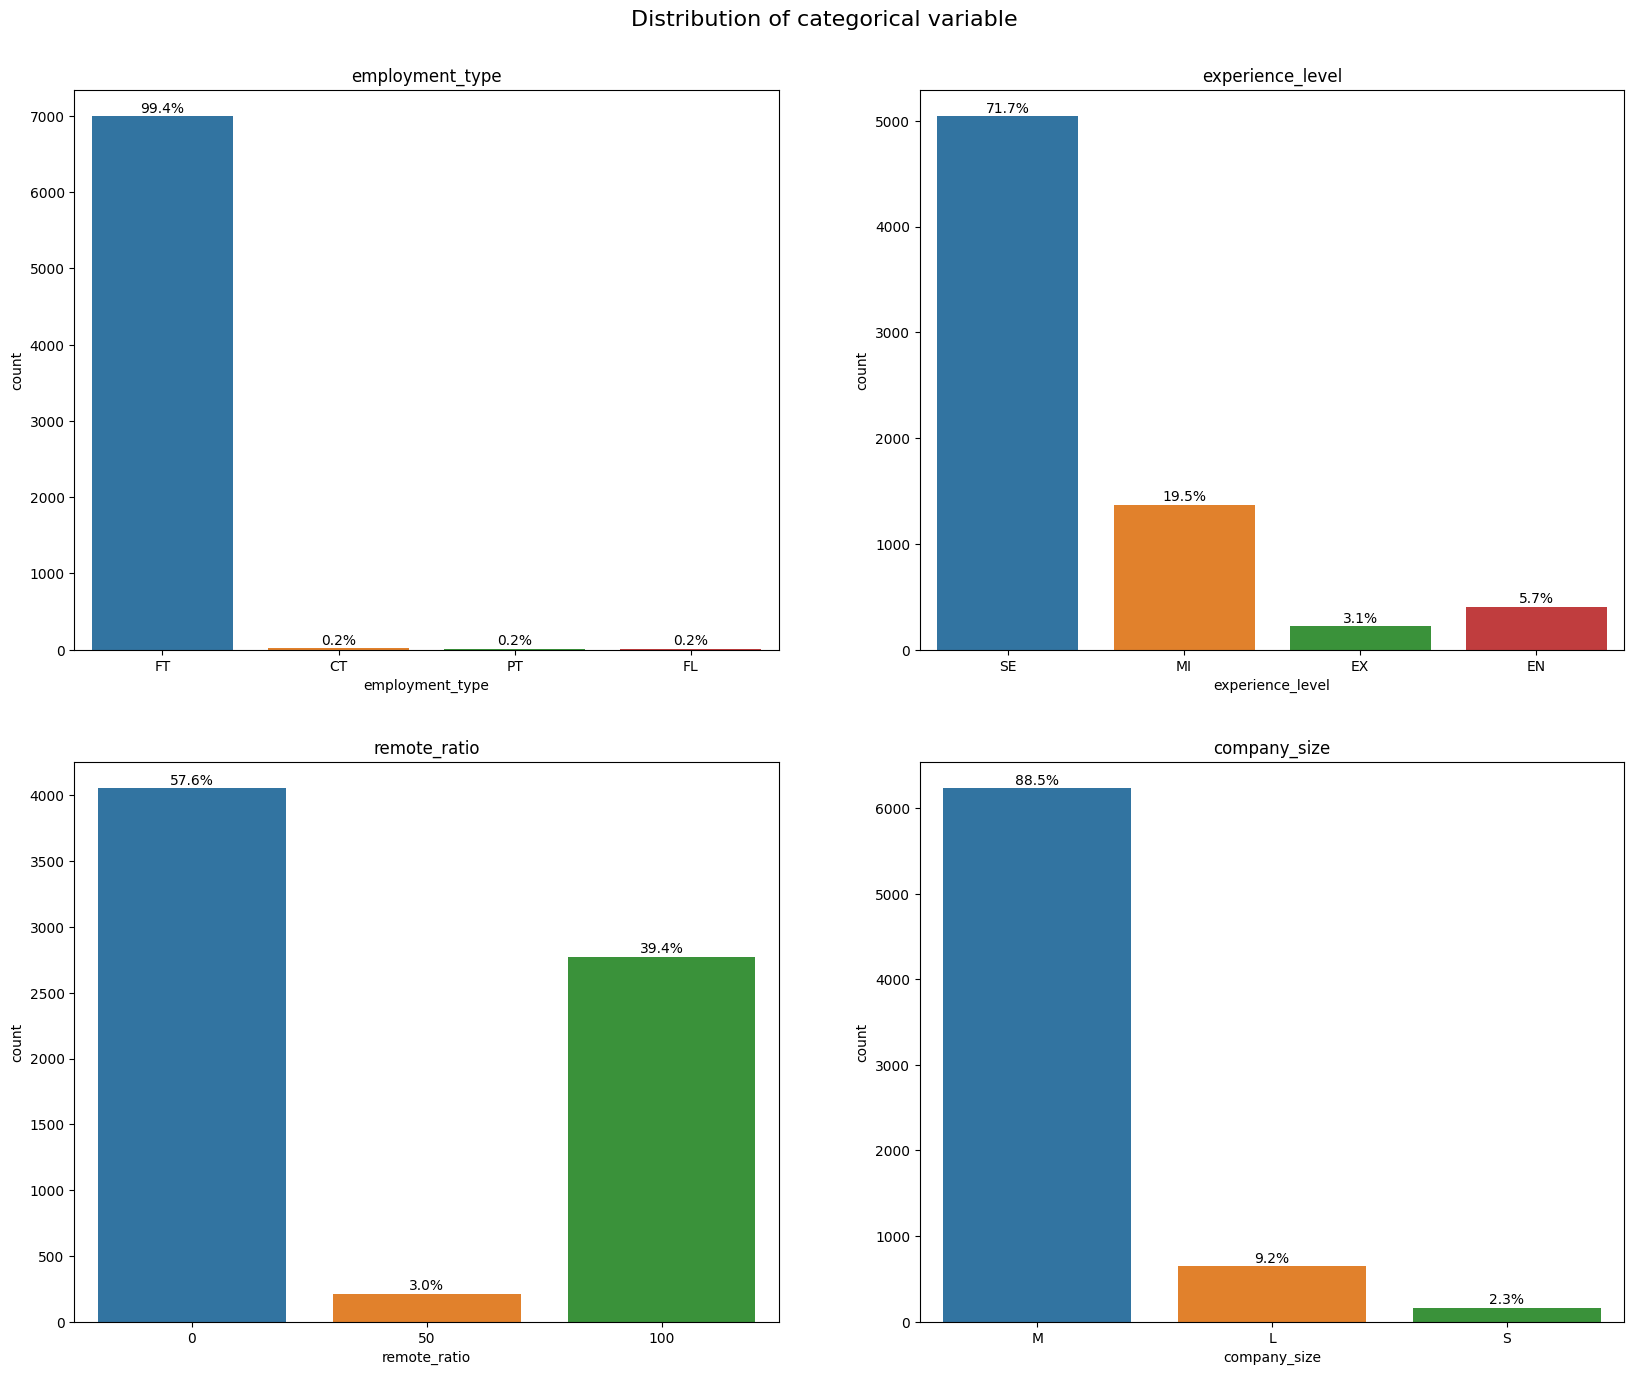

In [9]:
# plot categorical columns that do not have high cardinality (job_title, salary_currency, employee_residence, company_location)
countplots_custom(data, ['employment_type', 'experience_level', 'remote_ratio', 'company_size'], 2, 2, 'Distribution of categorical variable',size=(20,16))

**_Insight_**:
- 99.4% employees have full-time work.
- The level of experience that has the highest proportion is Senior-level (Expert) at 71.7%. Then followed by Mid-level (Intermediate), Entry-level (Junior), and Executive-level (Director).
- 57.6% employees are not working remotely. We can say that AI-related work is still possible to do both remotely and/or not remotely.
- There are 88.5% medium-sized companies (50 to 250 employees). This means that the company (startup) is in the Expansion to Dunbar phase. ([The Startup Maturity Framework](https://medium.com/startup-maturity/the-startup-maturity-framework-b7ebb4b03ed0))

## `Data Cleaning`

### 1️⃣ Handling High Cardinality

#### 1.1. Job Title

##### 1.1.1. job_position

In [19]:
# job_position
"""
classify job positions based on:
1. Director
2. Head
3. Manager
4. Lead
5. Staff
"""

position = ['STAFF', 'LEAD', 'MANAGER', 'HEAD', 'DIRECTOR']

def convPost(x):
    if position[0] in x:
        return position[0]
    elif position[1] in x:
        return position[1]
    elif position[2] in x:
        return position[2]
    elif position[3] in x:
        return position[3]
    elif position[4] in x:
        return position[4]
    else:
        return 'STAFF'


In [20]:
data['job_position'] = data['job_title'].str.upper().apply(lambda x: convPost(x))
data['job_position'].value_counts()

STAFF       6695
MANAGER      223
LEAD          56
HEAD          40
DIRECTOR      24
Name: job_position, dtype: int64

##### 1.1.2. job_scope

In [21]:
# job scope
"""
classify job scope based on:
1. Data Scientist
2. Data Analyst
3. Data Engineer
4. ML/AI Engineer
5. Business Intelligence
6. Analytics Engineer
7. Data Architect
8. Research/Applied Scientist
9. Others
"""

scope = ['DATA SCIEN', 'DATA ANALY', 'DATA ENGIN']

def convScp(x):
    if 'DATA SCIEN' in x:
        return 'DATA SCIENTIST'
    elif 'DATA ANALY' in x:
        return 'DATA ANALYST'
    elif any([t in x for t in ['DATA ENGINEER','ETL','DATABASE']]) or ('DATA' in x and 'ENGINEER' in x):
        return 'DATA ENGINEER'
    elif any([t in x for t in ['ML','MACHINE LEARNING','AI','ARTIFICIAL INTELLIGENCE','COMPUTER VISION','NLP', 'DEEP LEARNING']]):
        return 'ML/AI ENGINEER'
    elif any([t in x for t in ['BI', 'BUSINESS INTELLIGENCE']]):
        return 'BUSINESS INTELLIGENCE'
    elif 'ANALYTICS ENGINEER' in x:
        return 'ANALYTICS ENGINEER'
    elif 'DATA ARCHITECT' in x:
        return 'DATA ARCHITECT'
    elif any([t in x for t in ['RESEARCH','APPLIED']]):
        return 'RESEARCH/APPLIED SCIENTIST'
    else:
        return 'OTHERS'

In [22]:
data['job_scope'] = data['job_title'].str.upper().apply(lambda x: convScp(x))
data['job_scope'].value_counts()

DATA ENGINEER                 1788
DATA SCIENTIST                1713
DATA ANALYST                  1176
ML/AI ENGINEER                1031
RESEARCH/APPLIED SCIENTIST     504
OTHERS                         288
ANALYTICS ENGINEER             201
BUSINESS INTELLIGENCE          183
DATA ARCHITECT                 154
Name: job_scope, dtype: int64

In [23]:
data.query("job_scope == 'OTHERS'")['job_title'].value_counts()

Data Manager                     96
Data Specialist                  34
Decision Scientist               34
Head of Data                     25
Data Modeler                     16
Data Strategist                  16
Data Quality Analyst             14
Data Operations Analyst          10
Data Integration Specialist       7
Insight Analyst                   6
Data Lead                         6
Data Operations Specialist        4
Data Management Specialist        3
Data Developer                    2
Bear Robotics                     2
Data Strategy Manager             2
Data Visualization Specialist     2
Data Operations Manager           2
Data Modeller                     2
Data Visualization Analyst        2
Autonomous Vehicle Technician     2
Manager Data Management           1
Name: job_title, dtype: int64

**_Insight:_**
- job_title above is a job_title that is classify as "**Others**" in job_scope

### 2️⃣ Handling Duplicated Data

In [24]:
# display duplicated data
display(f"number of duplicated data {data.loc[data.duplicated()].shape[0]}: rows", 
        data.loc[data.duplicated()])

'number of duplicated data 2788: rows'

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope
75,2023,SE,FT,Data Engineer,135000,USD,135000,US,0,US,M,STAFF,DATA ENGINEER
76,2023,SE,FT,Data Engineer,90000,USD,90000,US,0,US,M,STAFF,DATA ENGINEER
95,2023,SE,FT,Machine Learning Engineer,226600,USD,226600,US,0,US,M,STAFF,ML/AI ENGINEER
96,2023,SE,FT,Machine Learning Engineer,140100,USD,140100,US,0,US,M,STAFF,ML/AI ENGINEER
105,2023,SE,FT,Research Scientist,303050,USD,303050,US,0,US,M,STAFF,RESEARCH/APPLIED SCIENTIST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M,STAFF,DATA SCIENTIST
6740,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M,STAFF,DATA ENGINEER
6741,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M,STAFF,DATA ENGINEER
6880,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L,STAFF,DATA ENGINEER


In [25]:
# delete duplicated data
data = data.drop_duplicates(keep='last', ignore_index=True)

### 3️⃣ SAVE CLEAN DATA

In [26]:
# drop job_title, salary, and salary_currency columns bercause we don't need anymore
dataClean = data.copy().drop(columns=['job_title','salary','salary_currency'])
dataClean

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope
0,2023,SE,FT,132000,US,100,US,M,STAFF,DATA ENGINEER
1,2023,MI,FT,81206,GB,0,GB,M,STAFF,ML/AI ENGINEER
2,2023,EX,FT,330000,US,0,US,M,HEAD,ML/AI ENGINEER
3,2023,EX,FT,188000,US,0,US,M,HEAD,ML/AI ENGINEER
4,2023,MI,FT,140000,US,0,US,M,STAFF,BUSINESS INTELLIGENCE
...,...,...,...,...,...,...,...,...,...,...
4245,2020,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST
4246,2021,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST
4247,2020,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST
4248,2020,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST


In [28]:
# save clean data into csv format
dataClean.to_csv("../data/processed/salaries_clean.csv", index=False)

-------
-------
-------